In [51]:
# 1. Load any packages you need.
# I recommend the following:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import entropy
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
import statsmodels.api as sm
from sklearn.metrics import silhouette_score

In [52]:
# Quiet down some of the warnings
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [53]:
# 2. Set the working directory to your Lab11 folder
notebook_directory = os.path.abspath('')  #Get the current working directory
os.chdir(notebook_directory)  #Set the working directory
print("current working directory", os.getcwd()) #Print the current working directory

current working directory /Users/ying-tungchou/Desktop/MIS 545/Project 


In [54]:
# 3. Read CountryData.csv into the CountryData data frame.

NewCollTui = pd.read_csv('NewTui.CSV')

In [55]:
# 4. Display the tuition data tibble on the console
print(NewCollTui)

     Code      Institution Type     Year                      School Type  \
0       1      All Institutions  1966-67  All (4 and 2 Year Institutions)   
1       2      All Institutions  1967-68  All (4 and 2 Year Institutions)   
2       3      All Institutions  1968-69  All (4 and 2 Year Institutions)   
3       4      All Institutions  1969-70  All (4 and 2 Year Institutions)   
4       5      All Institutions  1970-71  All (4 and 2 Year Institutions)   
..    ...                   ...      ...                              ...   
463   464  Private Institutions  2013-14                           2 Year   
464   465  Private Institutions  2014-15                           2 Year   
465   466  Private Institutions  2015-16                           2 Year   
466   467  Private Institutions  2016-17                           2 Year   
467   468  Private Institutions  2017-18                           2 Year   

     Total (Inflation Adjusted)  Tuition & Fees (Inflation Adjusted)  \
0  

In [56]:
# 5. Display the structure of the dataframe.
print(NewCollTui.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Code                                 468 non-null    int64  
 1   Institution Type                     468 non-null    object 
 2   Year                                 468 non-null    object 
 3   School Type                          468 non-null    object 
 4   Total (Inflation Adjusted)           468 non-null    float64
 5   Tuition & Fees (Inflation Adjusted)  468 non-null    float64
 6   Room (Inflation Adjusted)            468 non-null    float64
 7   Board (Inflation Adjusted)           468 non-null    float64
 8   Total                                468 non-null    float64
 9   Tuition & Fees                       468 non-null    float64
 10  Room                                 468 non-null    float64
 11  Board                           

In [57]:
# 6. Display a summary of the dataframe.
print(NewCollTui.describe())

             Code  Total (Inflation Adjusted)  \
count  468.000000                  468.000000   
mean   234.500000                15459.509441   
std    135.244224                 8568.805426   
min      1.000000                 5351.929398   
25%    117.750000                 8607.216653   
50%    234.500000                12815.376455   
75%    351.250000                19568.154628   
max    468.000000                43139.294603   

       Tuition & Fees (Inflation Adjusted)  Room (Inflation Adjusted)  \
count                           468.000000                 468.000000   
mean                           8284.492843                3570.587449   
std                            6929.045574                1301.408118   
min                             912.089376                1605.578819   
25%                            2612.760228                2549.767595   
50%                            6224.678691                3143.249981   
75%                           11294.331970     

In [58]:
# 8. Remove countries from the dataframe with missing data in any feature.
NewCollTui= NewCollTui.dropna()
print(NewCollTui)

     Code      Institution Type     Year                      School Type  \
0       1      All Institutions  1966-67  All (4 and 2 Year Institutions)   
1       2      All Institutions  1967-68  All (4 and 2 Year Institutions)   
2       3      All Institutions  1968-69  All (4 and 2 Year Institutions)   
3       4      All Institutions  1969-70  All (4 and 2 Year Institutions)   
4       5      All Institutions  1970-71  All (4 and 2 Year Institutions)   
..    ...                   ...      ...                              ...   
463   464  Private Institutions  2013-14                           2 Year   
464   465  Private Institutions  2014-15                           2 Year   
465   466  Private Institutions  2015-16                           2 Year   
466   467  Private Institutions  2016-17                           2 Year   
467   468  Private Institutions  2017-18                           2 Year   

     Total (Inflation Adjusted)  Tuition & Fees (Inflation Adjusted)  \
0  

In [59]:
# 9. View the summary of the tuition dataframe again to ensure there are no NA values
NewCollTui.describe()

,Code,Total (Inflation Adjusted),Tuition & Fees (Inflation Adjusted),Room (Inflation Adjusted),Board (Inflation Adjusted),Total,Tuition & Fees,Room,Board
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,234.500000,15459.509441,8284.492843,3570.587449,3604.429150,9762.640920,5410.183940,2253.841363,2098.615617
std,135.244224,8568.805426,6929.045574,1301.408118,676.328862,9020.057025,6302.384509,1770.884998,1335.581256
min,1.000000,5351.929398,912.089376,1605.578819,2679.969894,710.000000,121.000000,213.000000,376.000000
25%,117.750000,8607.216653,2612.760228,2549.767595,3094.072124,2918.266133,1108.294573,701.578568,883.376174
50%,234.500000,12815.376455,6224.678691,3143.249981,3370.929468,6520.894356,2690.452680,1737.024504,1831.645576
75%,351.250000,19568.154628,11294.331970,4421.723367,4044.921214,14086.783094,7461.877652,3364.944613,2980.612368
max,468.000000,43139.294603,30731.211677,6967.418708,5961.277868,43139.294603,30731.211677,6967.418708,5440.664218


In [60]:
#please show the column name
print(NewCollTui.columns)

Index(['Code', 'Institution Type', 'Year', 'School Type',
       'Total (Inflation Adjusted)', 'Tuition & Fees (Inflation Adjusted)',
       'Room (Inflation Adjusted)', 'Board (Inflation Adjusted)', 'Total',
       'Tuition & Fees', 'Room', 'Board'],
      dtype='object')


In [61]:

# Create dummy variables for 'Institution Type'
NewCollTui = pd.get_dummies(NewCollTui, columns=['Institution Type'], drop_first=True)

# Assuming 'Year' is the column you want to modify
NewCollTui['Year'] = pd.to_numeric(NewCollTui['Year'].str[:4], errors='coerce')


In [62]:
print(NewCollTui.columns)

Index(['Code', 'Year', 'School Type', 'Total (Inflation Adjusted)',
       'Tuition & Fees (Inflation Adjusted)', 'Room (Inflation Adjusted)',
       'Board (Inflation Adjusted)', 'Total', 'Tuition & Fees', 'Room',
       'Board', 'Institution Type_Private Institutions',
       'Institution Type_Public Institutions'],
      dtype='object')


In [63]:
NewCollTui = NewCollTui.drop('School Type', axis=1)

In [64]:
# 10. We are going to cluster the data
NewCollTui_Scaled = NewCollTui[['Year', 'Tuition & Fees (Inflation Adjusted)']]
NewCollTui_Scaled = (NewCollTui_Scaled - NewCollTui_Scaled.mean()) / NewCollTui_Scaled.std()
print(NewCollTui_Scaled)

         Year  Tuition & Fees (Inflation Adjusted)
0   -1.697240                            -0.571207
1   -1.630682                            -0.576968
2   -1.564123                            -0.596903
3   -1.497565                            -0.584045
4   -1.431006                            -0.575410
..        ...                                  ...
463  1.431006                             0.963990
464  1.497565                             0.962107
465  1.564123                             0.987705
466  1.630682                             0.957345
467  1.697240                             0.953857

[468 rows x 2 columns]


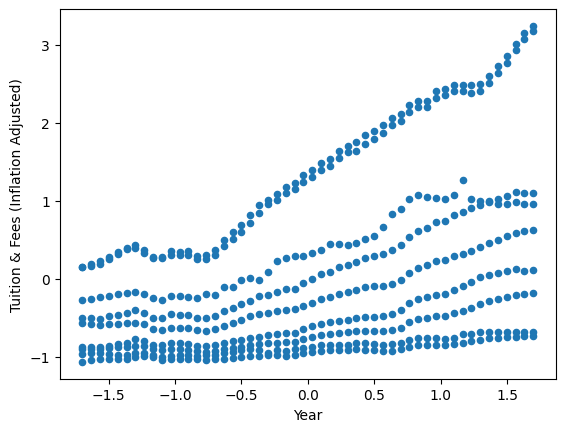

In [65]:
# 11. Display a plot of the scaled data.
NewCollTui_Scaled.plot.scatter(x='Year', y='Tuition & Fees (Inflation Adjusted)')
plt.show()

In [39]:
# 12. Generate the k-means clusters in an object called NewCollTuiClusters using 4 clusters and a value of 25 for nstart. Set the random seed to 679.
np.random.seed(679)
NewCollTuiClusters = KMeans(n_clusters=4, n_init=25).fit(NewCollTui_Scaled)
print(NewCollTuiClusters)

KMeans(n_clusters=4, n_init=25)


In [66]:
# 13. Display cluster sizes on the console
NewCollTuiClusters.labels_
pd.Series(NewCollTuiClusters.labels_).value_counts()

1    203
3    132
2     92
0     41
dtype: int64

In [67]:
# 14. Display cluster centers (z-scores) on the console
NewCollTuiClusters.cluster_centers_

array([[ 1.04788954,  2.39048549],
       [-0.97099907, -0.50832143],
       [ 0.64171015,  0.82041039],
       [ 0.7205455 , -0.53256372]])

In [68]:
# 15. Display the entropy of the clusters on the console
entropy(pd.Series(NewCollTuiClusters.labels_).value_counts())

1.2523749810666378

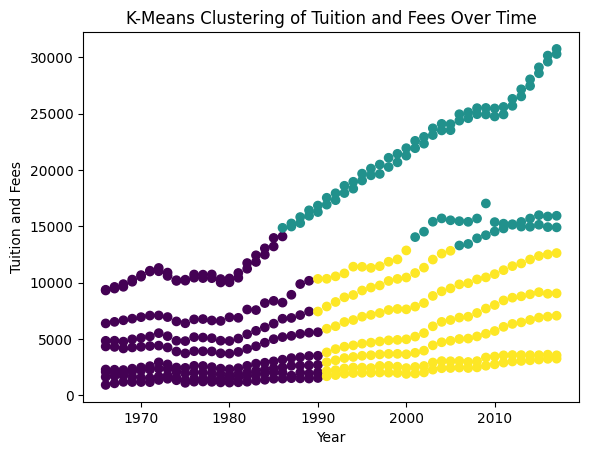

In [69]:
# Select relevant features
features = NewCollTui[['Year', 'Tuition & Fees (Inflation Adjusted)']]

# Standardize the data (important for K-Means)
features_standardized = (features - features.mean()) / features.std()

# Choose the number of clusters (you may need to adjust this based on your data)
num_clusters = 3

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
NewCollTui['cluster'] = kmeans.fit_predict(features_standardized)

# Plot the clusters
plt.scatter(NewCollTui['Year'], NewCollTui['Tuition & Fees (Inflation Adjusted)'], c=NewCollTui['cluster'], cmap='viridis')
plt.xlabel('Year')
plt.ylabel('Tuition and Fees')
plt.title('K-Means Clustering of Tuition and Fees Over Time')
plt.show()

In [70]:
#know the performance
# Assuming X is your data
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)

# Inertia
inertia = kmeans.inertia_

# Silhouette Score
silhouette_avg = silhouette_score(features, kmeans.labels_)
print("For n_clusters =", 2,
      "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6572362556173932


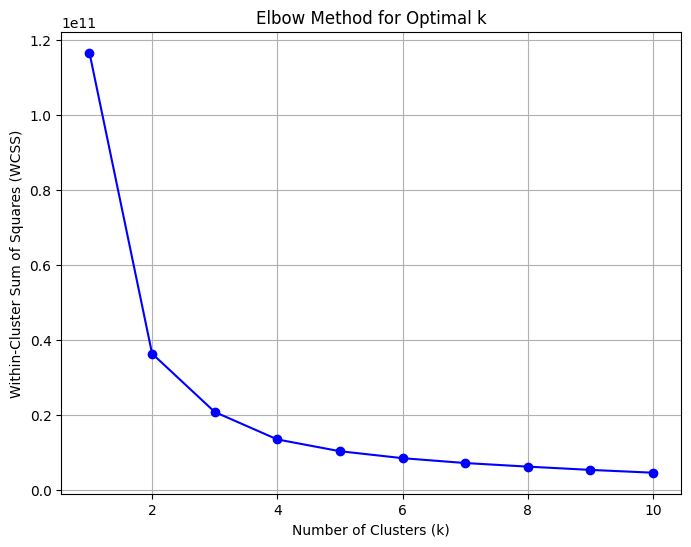

In [71]:
# 17. Run the k-means algorithm again for 1 to 10 clusters and plot the elbow method graph.
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(NewCollTui)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [72]:
# 18. Regenerate the cluster analysis using the optimal number of clusters
# Regenerate cluster analysis using the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=2, random_state=42)
cluster_assignments_optimal = kmeans_optimal.fit_predict(NewCollTui)

# Display cluster centers on the console
print("Cluster Centers (Z-scores):")
for cluster, center in enumerate(kmeans_optimal.cluster_centers_):
    print(f"Cluster {cluster + 1}: {center}")


Cluster Centers (Z-scores):
Cluster 1: [2.32013889e+02 1.98713611e+03 1.15364753e+04 5.20170431e+03
 3.02570512e+03 3.30906589e+03 5.65190761e+03 2.48459359e+03
 1.57686052e+03 1.59045350e+03 2.16666667e-01 4.19444444e-01
 8.02777778e-01]
Cluster 2: [2.42787037e+02 2.00604630e+03 2.85362899e+04 1.85604546e+04
 5.38686187e+03 4.58897336e+03 2.34650853e+04 1.51621518e+04
 4.51044416e+03 3.79248935e+03 7.22222222e-01 4.62962963e-02
 1.17592593e+00]


In [73]:
# 19. Display cluster sizes on the console
#Calculate cluster sizes using Counter
cluster_sizes = Counter(cluster_assignments_optimal)
print(cluster_sizes)

Counter({0: 360, 1: 108})


In [74]:
# 20. Display cluster centers (z-scores) on the console
# Display cluster centers on the console
print("Cluster Centers (Z-scores):")
for cluster, center in enumerate(kmeans_optimal.cluster_centers_):
    print(f"Cluster {cluster + 1}: {center}")


Cluster Centers (Z-scores):
Cluster 1: [2.32013889e+02 1.98713611e+03 1.15364753e+04 5.20170431e+03
 3.02570512e+03 3.30906589e+03 5.65190761e+03 2.48459359e+03
 1.57686052e+03 1.59045350e+03 2.16666667e-01 4.19444444e-01
 8.02777778e-01]
Cluster 2: [2.42787037e+02 2.00604630e+03 2.85362899e+04 1.85604546e+04
 5.38686187e+03 4.58897336e+03 2.34650853e+04 1.51621518e+04
 4.51044416e+03 3.79248935e+03 7.22222222e-01 4.62962963e-02
 1.17592593e+00]


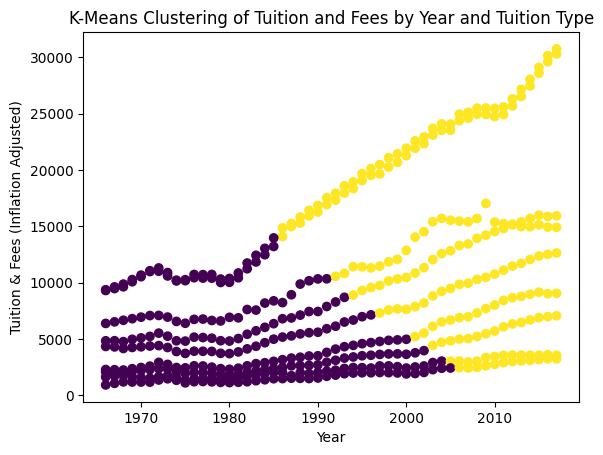

In [77]:
#group-data cluster


# Select relevant features
features = NewCollTui[['Year', 'Tuition & Fees (Inflation Adjusted)']]

# Standardize the data (important for K-Means)
features_standardized = (features - features.mean()) / features.std()

# Choose the number of clusters (you may need to adjust this based on your data)
num_clusters = 2

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
NewCollTui['cluster'] = kmeans.fit_predict(features_standardized)

# Plot the clusters
plt.scatter(NewCollTui['Year'], NewCollTui['Tuition & Fees (Inflation Adjusted)'], c=NewCollTui['cluster'], cmap='viridis')
plt.xlabel('Year')
plt.ylabel('Tuition & Fees (Inflation Adjusted)')
plt.title('K-Means Clustering of Tuition and Fees by Year and Tuition Type')
plt.show()

In [78]:
#know the performance after optimize the cluster
# Assuming X is your data
kmeans = KMeans(n_clusters=2)
kmeans.fit(features)

# Inertia
inertia = kmeans.inertia_

# Silhouette Score
silhouette_avg = silhouette_score(features, kmeans.labels_)
print("For n_clusters =", 2,
      "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6672105253778592
